In [1]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [2]:
print iris.head()

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

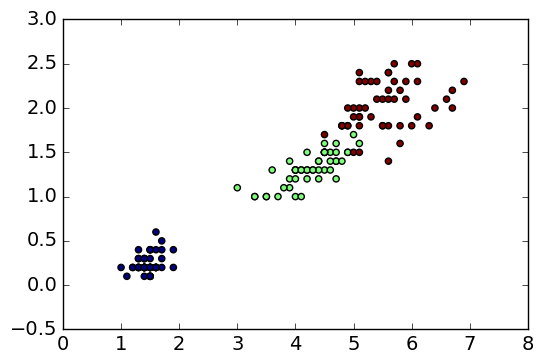

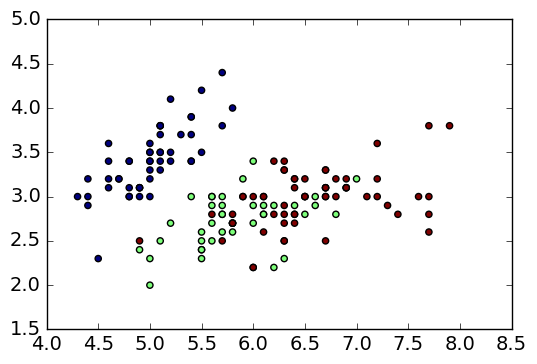

In [4]:
# map each iris species to a number
# let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column caled 'species_num'
iris['species_num'] = [0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2 for x in iris.species]

# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
plt.scatter(iris.petal_length, iris.petal_width, c=iris.species_num)
plt.show() #this just ensures that my plots will show up

# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
plt.scatter(iris.sepal_length, iris.sepal_width, c=iris.species_num)



## KNN Modeling


### Store feature matrix in "X"


In [5]:
#My features are going to be everything except what my species is


X = iris[['sepal_width','sepal_length','petal_width','petal_length']]
X.head()

,sepal_width,sepal_length,petal_width,petal_length
0,3.5,5.1,0.2,1.4
1,3.0,4.9,0.2,1.4
2,3.2,4.7,0.2,1.3
3,3.1,4.6,0.2,1.5
4,3.6,5.0,0.2,1.4


### Store response vector in "y"


In [6]:
#my y is going to be the species (because that's what i'm predicting)
y = iris.species_num
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

### Make use of train, test, split

In [16]:
from sklearn.model_selection import train_test_split #importing this from model_evaluation instead of cross_val
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33) #and creating a train and test set using TTS

### Import KNN from SKLearn, instatiate a model with one neighbor


In [17]:
from sklearn.neighbors import KNeighborsClassifier #import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) #set my neighboour to be 1
knn.fit(X_train, y_train) #fit my train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Check the accuracy


In [18]:
knn.score(X_test, y_test) #this is really good.

0.93999999999999995

### Create a model with 5 neighbors. Did it improve?


In [19]:
knn5 = KNeighborsClassifier(n_neighbors = 5) #hey! that got better!
knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

0.97999999999999998

### Create a looped function that will check all levels of various neighbors. Implement it.

5 0.98


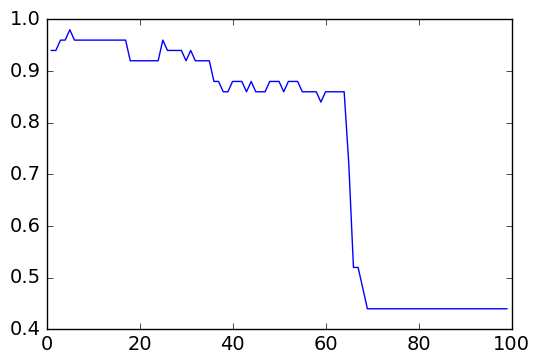

In [21]:
k_scores = {} #create an empty dictionary
best_score = 0 
best_k = 0 
for i in range(1,len(X_train)): #loop through integers from 1 through however many obvervations there are in the training data
    knn = KNeighborsClassifier(n_neighbors = i) #for every single integer, set neighbours to be that number of integers
    knn.fit(X_train, y_train) #and then fit a model to the training data
    score = knn.score(X_test, y_test) #and save the score for each fit
    k_scores[i] = score #add this to the empty dictionary with the number of neighbours: score
    if score > best_score: #if the current score is better than whatever is currently the best score
        best_score = score #save the current score as best score
        best_k = i #and the current number of neighbours as best_k
print best_k, best_score #and then print out exactly what is the best_k and best_score

plt.plot(k_scores.keys(), k_scores.values()) #and plot it too!

### Bonus: according to SKLearn documentation, what is 'knn.predict_proba(X_new)' going to do?


According to SKLearn, predict_proba() returns probability estimates for test data. So instead of returning what it thinks an obversation is going to be classified as, it's giving us the _probability_ of each new prediction being in a certain class.